<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [131]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [132]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [133]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [134]:
# Answer:

movies.loc[:,"duration"].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [135]:
# Answer:
dur=movies.loc[:,"duration"].sort_values()
print(dur.head(1))
print(dur.tail(1))

389    64
Name: duration, dtype: int64
476    242
Name: duration, dtype: int64


#### Create a histogram of duration, choosing an "appropriate" number of bins.

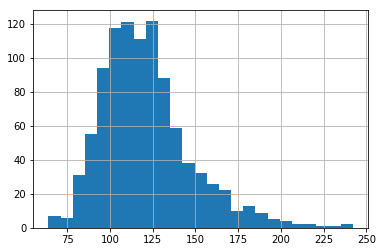

In [136]:
# Answer:
dur.hist(bins=25)

#### Use a box plot to display that same data.

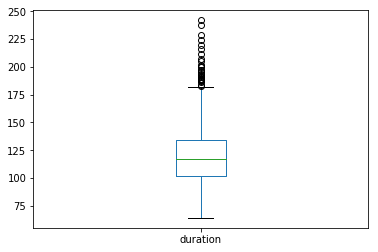

In [137]:
# Answer:
dur.plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [234]:
# Answer:
rating=movies.loc[:,'content_rating'].value_counts()

#### Use a visualization to display that same data, including a title and x and y labels.

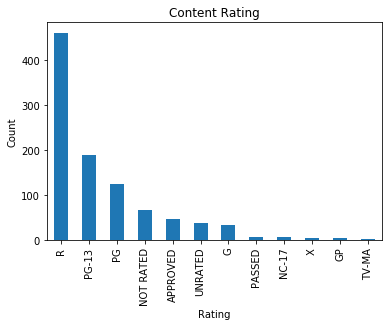

In [139]:
# Answer:
ax=rating.plot(kind='bar')
ax.set_title('Content Rating')
ax.set_xlabel('Rating')
ax.set_ylabel('Count');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [236]:
# Answer:
rating.rename(index={'NOT RATED':'UNRATED','APPROVED':'UNRATED','PASSED':'UNRATED','GP':'UNRATED'},inplace=True)
rating

R          463
PG-13      189
PG         123
UNRATED     65
UNRATED     47
UNRATED     38
G           32
UNRATED      7
NC-17        7
X            4
UNRATED      3
TV-MA        1
dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [237]:
# Answer:
rating.rename(index={'X':'NC-17','TV-MA':'NC-17'},inplace=True)
rating

R          463
PG-13      189
PG         123
UNRATED     65
UNRATED     47
UNRATED     38
G           32
UNRATED      7
NC-17        7
NC-17        4
UNRATED      3
NC-17        1
dtype: int64

#### Count the number of missing values in each column.

In [142]:
# Answer:
movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [143]:
# Answer:
movies.loc[movies.loc[:,'content_rating'].isna(),:]
movies.loc[:,'content_rating']=movies.loc[:,'content_rating'].fillna('R')

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [144]:
# Answer:
print(movies.loc[movies.loc[:,'duration'] < 120,:].mean())
print(movies.loc[~(movies.loc[:,'duration'] < 120),:].mean())

star_rating      7.838667
duration       102.405714
dtype: float64
star_rating      7.948899
duration       142.458150
dtype: float64


#### Use a visualization to detect whether there is a relationship between duration and star rating.

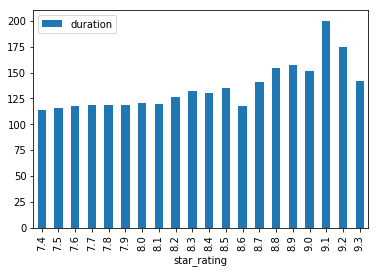

In [206]:
# Answer:
movies.groupby('star_rating').agg({'duration':'mean'}).plot(kind='bar')

#### Calculate the average duration for each genre.

In [146]:
# Answer:
movies.groupby('genre').agg({'duration':'mean'})

,duration
genre,
Action,126.485294
Adventure,134.840000
Animation,96.596774
Biography,131.844156
Comedy,107.602564
Crime,122.298387
Drama,126.539568
Family,107.500000
Fantasy,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

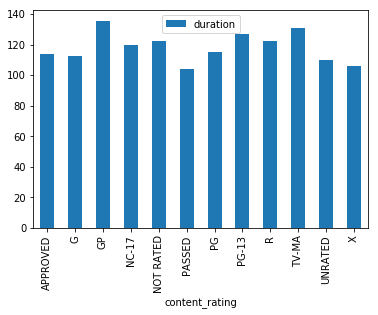

In [147]:
# Answer:
movies.groupby('content_rating').agg({'duration':'mean'}).plot(kind='bar')

#### Find the title of the movie with the highest star rating in each genre

In [148]:
# Answer:

movies.groupby('genre')['star_rating'].max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [158]:
# Answer:
##movies['title'] == "True Grit" or movies['title'] == "Les Miserables"
movies['title'].value_counts()>1
movies.loc[movies.title.isin(['True Grit','Les Miserables','The Girl with the Dragon Tattoo','Dracula']),:]

##They do not appear to be duplicates. They feature different actors.

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,APPROVED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,R,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [ ]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [205]:
# Answer:
i=0
rel_genres=[]
genres = movies.loc[:,'genre'].value_counts()
while i < len(genres):
    if genres[i] > 9:
        rel_genres.append(genres.index[i])
    i=i+1

    
print(rel_genres)
movies.loc[movies.genre.isin(rel_genres),:].groupby('genre')['star_rating'].mean()

['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']


genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!